## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

In [2]:
X=np.array(
    [
        [0.4,1.1],
        [1.2,1.9],
        [1.9,1.7],
        [2,2.8],
        [2.8,2.3]
    ]
)
X.shape

(5, 2)

### Plot data

In [3]:
def plotCanvas():
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(7)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axhline(color='black',linestyle='dashed',lw=2)
    plt.axvline(color='black',linestyle='dashed',lw=2)

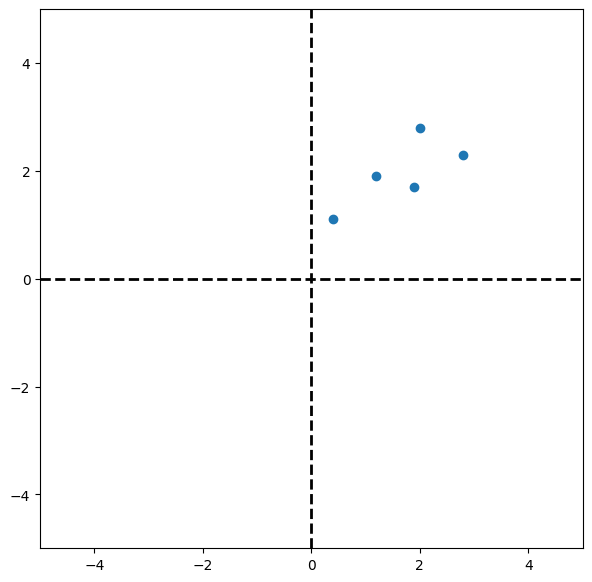

In [4]:
plotCanvas()
plt.scatter(X[:,0],X[:,1])

### Centralize data

In [5]:
def centralize(X):
    mean=[]
    for i in range(X.shape[1]):
        mean.append(np.mean(X[:,i]))
    for i in range(X.shape[1]):
        X[:,i]-=mean[i]
    return X

In [6]:
dataUncentered=np.copy(X)
X=centralize(X)

### Plot centralized data

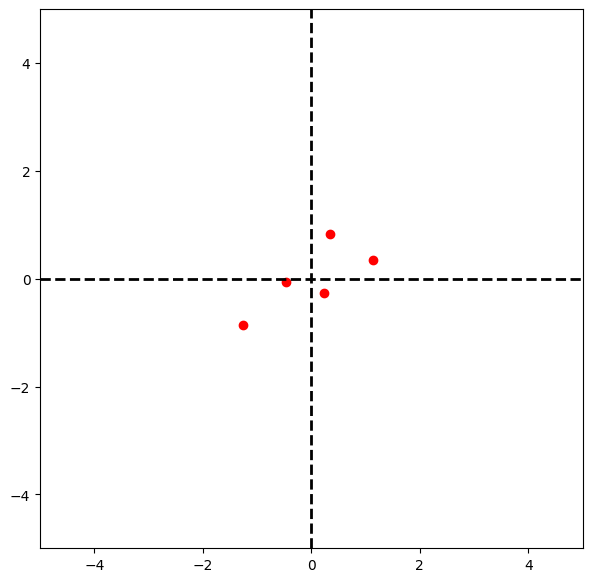

In [7]:
plotCanvas()
plt.scatter(X[:,0],X[:,1],c='red')

### Get covariance matrix

In [8]:
def covarianceMatrix(X):
    return (1/X.shape[0])*X.T@X

In [9]:
cov=covarianceMatrix(X)
pd.DataFrame(cov)

,0,1
0,0.6544,0.3444
1,0.3444,0.3264


### Find eign vectors, values

In [10]:
eignValues,eignVectors=np.linalg.eig(cov)

In [11]:
print(eignValues)
pd.DataFrame(eignVectors,columns=['First','Second'],index=['X','Y'])

[0.87185427 0.10894573]


,First,Second
X,0.845557,-0.533885
Y,0.533885,0.845557


### Sum of squared distances

In [12]:
def sumOfSquaredDistances(X,eignVector):
    projections=[]
    for i in range(len(X)):
        c=0
        for j in range(X.shape[1]):
            c+=X[i,j]*eignVector[j]
        projections.append((np.linalg.norm(c*X[i,:]))**2)
    return sum(projections)

In [13]:
SSD=[]

SSD.append(sumOfSquaredDistances(X,eignVectors[:,0]))
SSD.append(sumOfSquaredDistances(X,eignVectors[:,1]))

SSD

[7.749231043463945, 0.4057753565360533]

### Plot eign vector and data

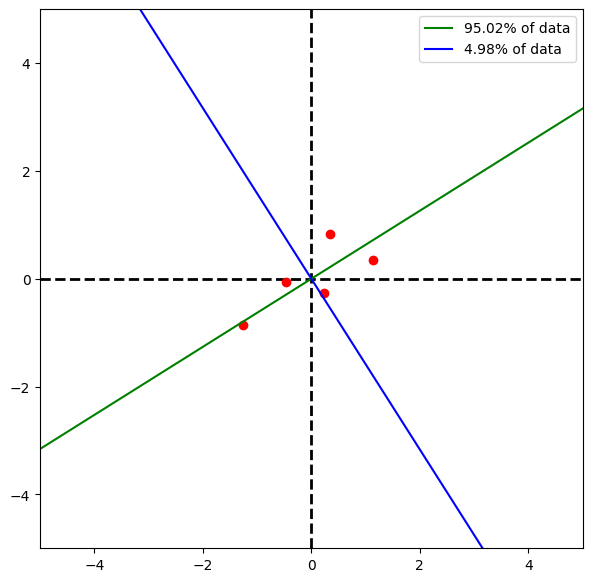

In [14]:
plotCanvas()
s=np.linspace(-5,5,100)

plt.plot(X[:,0],X[:,1],'o',c='red')

plt.plot(s,s*(-eignVectors[0][1]/eignVectors[1][1]),'-g',label=f'{round(SSD[0]/sum(SSD)*100,2)}% of data')
plt.plot(s,s*(-eignVectors[0][0]/eignVectors[1][0]),'-b',label=f'{round(SSD[1]/sum(SSD)*100,2)}% of data')
plt.legend(loc='upper right')
